# **Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# **Content**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.Class.value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#Using Robust Scaler(less prone to outliers) to time and amount columns since other columns are already scaled
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

In [ ]:
#Seeing if both the train and test label distribution are similarly distributed
print('train distribution:', original_ytrain.value_counts()/len(original_ytrain))
print('test distribution:', original_ytest.value_counts()/len(original_ytest))


train distribution: Class
0    0.998271
1    0.001729
Name: count, dtype: float64
test distribution: Class
0    0.99828
1    0.00172
Name: count, dtype: float64


In [ ]:
df.skew()

,0
scaled_amount,16.977724
scaled_time,-0.035568
V1,-3.280667
V2,-4.624866
V3,-2.240155
V4,0.676292
V5,-2.425901
V6,1.826581
V7,2.553907
V8,-8.521944


In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffling the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffling dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
27385,0.489066,-0.589304,-0.542939,0.443775,1.855028,-0.491399,-0.598173,0.070405,0.300841,0.022540,...,-0.566506,-0.085257,0.236460,-0.046380,0.045555,-0.377828,-0.472207,0.088242,0.142065,0
6446,-0.293440,-0.904851,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,...,0.422743,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,1
107263,-0.146720,-0.168364,-0.549179,0.575333,2.110009,-0.189921,0.173191,0.849991,0.045435,0.304159,...,0.133489,-0.014764,0.122829,-0.331940,-0.769249,0.040107,0.346045,0.096002,0.091456,0
26802,-0.041640,-0.592535,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,...,0.302735,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,1
107637,11.218193,-0.166308,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,...,2.285758,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,1


<ipython-input-19-a8806b9e676a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette='bwr')


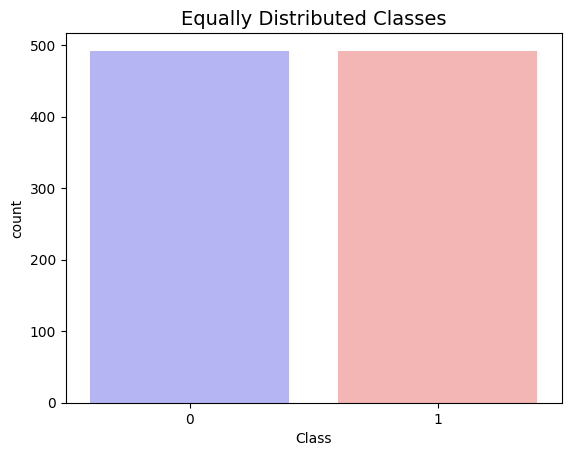

In [ ]:
sns.countplot(x='Class', data=new_df, palette='bwr')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
#Printing the correlation of Class column with the other features
corr = new_df.corr()
corr['Class'].sort_values(ascending=False)

,Class
Class,1.000000
V4,0.719081
V11,0.687876
V2,0.493580
V19,0.273105
V20,0.179932
V21,0.130175
V28,0.096934
V27,0.083585
scaled_amount,0.079250


<ipython-input-21-b24c496b4aeb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="V14", data=new_df, palette="plasma", ax=axes[0])
<ipython-input-21-b24c496b4aeb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="V12", data=new_df, palette="plasma", ax=axes[1])
<ipython-input-21-b24c496b4aeb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="V10", data=new_df, palette="plasma", ax=axes[2])
<ipython-input-21-b24c496b4aeb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

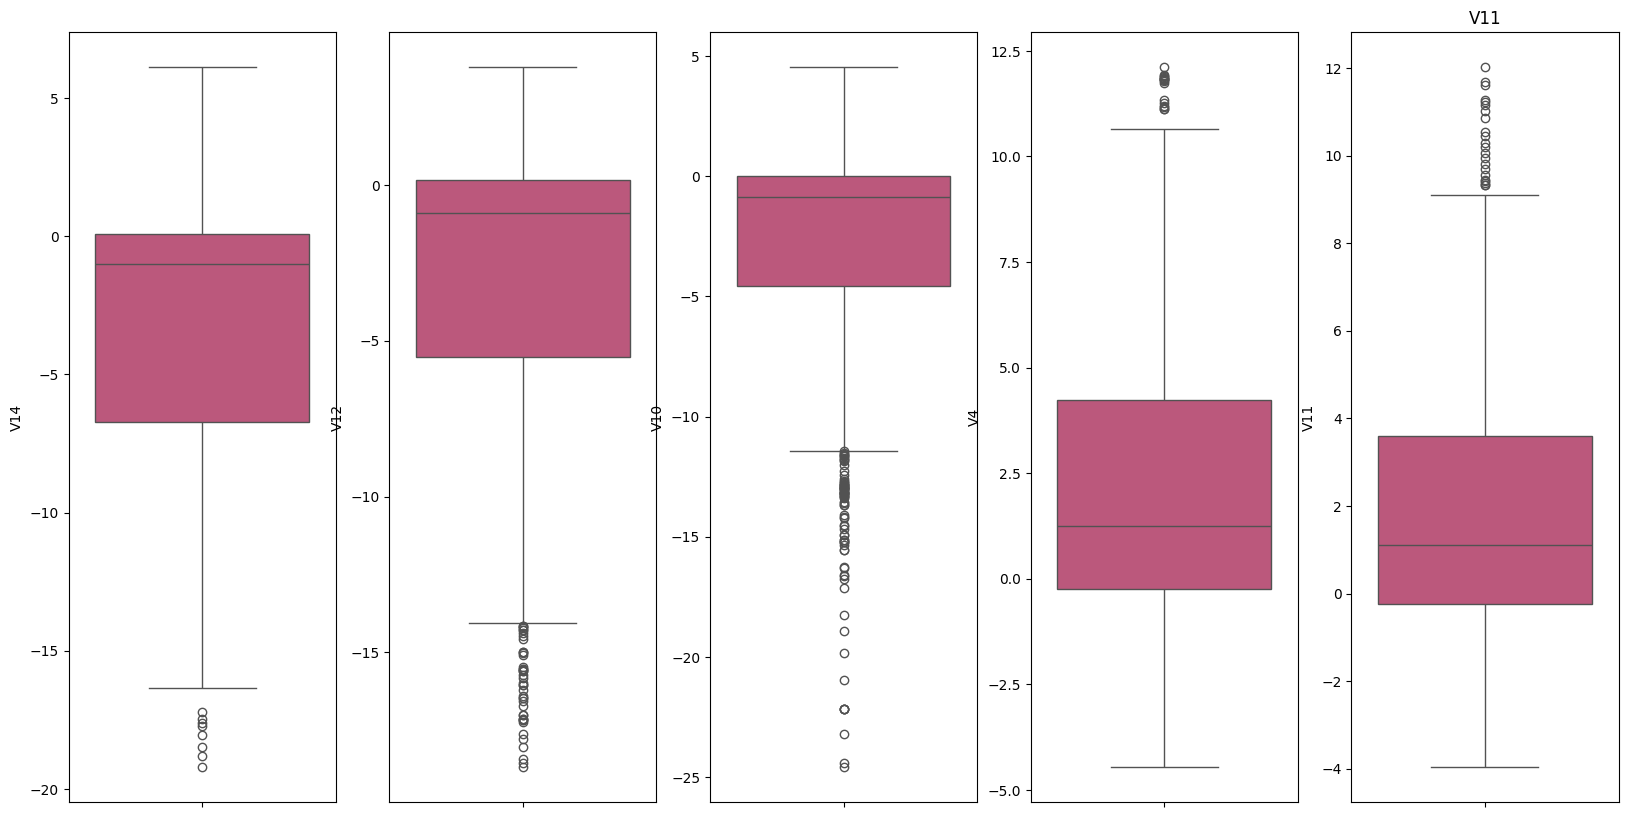

In [ ]:
#Visual Inspection for outliers in some fetures with high correlation
f, axes = plt.subplots(ncols=5, figsize=(20, 10))

sns.boxplot(y="V14", data=new_df, palette="plasma", ax=axes[0])
axes[4].set_title('V14')

sns.boxplot(y="V12", data=new_df, palette="plasma", ax=axes[1])
axes[4].set_title('V12')

sns.boxplot(y="V10", data=new_df, palette="plasma", ax=axes[2])
axes[4].set_title('V10')

sns.boxplot(y="V4", data=new_df, palette="plasma", ax=axes[3])
axes[4].set_title('V4')

sns.boxplot(y="V11", data=new_df, palette="plasma", ax=axes[4])
axes[4].set_title('V11')

plt.show()

In [ ]:
from scipy.stats import mstats

#Winsorizing Outliers v1-v28
for col in new_df.columns[2:-1]:
    new_df[col] = mstats.winsorize(new_df[col], limits=[0.05, 0.05])

<ipython-input-23-0c7eb5fae52b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="V14", data=new_df, palette="plasma", ax=axes[0])
<ipython-input-23-0c7eb5fae52b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="V12", data=new_df, palette="plasma", ax=axes[1])
<ipython-input-23-0c7eb5fae52b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="V10", data=new_df, palette="plasma", ax=axes[2])
<ipython-input-23-0c7eb5fae52b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

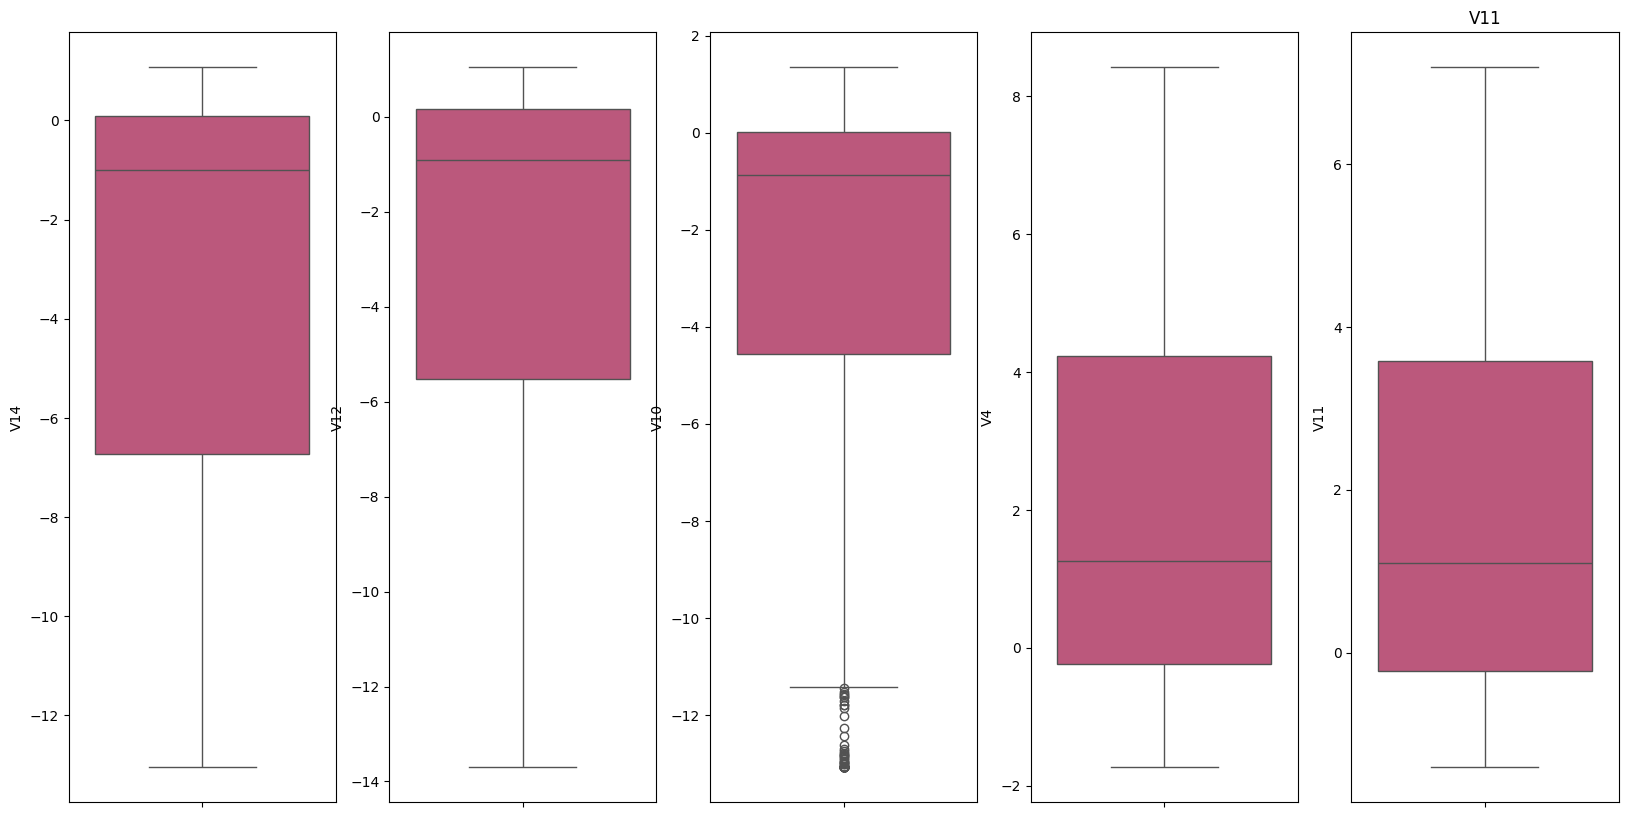

In [ ]:
#Visual Inspection after winsorizing
f, axes = plt.subplots(ncols=5, figsize=(20, 10))

sns.boxplot(y="V14", data=new_df, palette="plasma", ax=axes[0])
axes[4].set_title('V14')

sns.boxplot(y="V12", data=new_df, palette="plasma", ax=axes[1])
axes[4].set_title('V12')

sns.boxplot(y="V10", data=new_df, palette="plasma", ax=axes[2])
axes[4].set_title('V10')

sns.boxplot(y="V4", data=new_df, palette="plasma", ax=axes[3])
axes[4].set_title('V4')

sns.boxplot(y="V11", data=new_df, palette="plasma", ax=axes[4])
axes[4].set_title('V11')

plt.show()

In [ ]:
#Using t-SNE for dimentionality reduction
from sklearn.manifold import TSNE

X = new_df.drop('Class', axis=1)
y = new_df['Class']

tsne = TSNE(n_components=2, random_state=42)

X_red = tsne.fit_transform(X)


In [ ]:
#Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=42)

In [ ]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Roc AUC Score:\n', roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.98      0.88      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
 [[85  2]
 [13 97]] 

Roc AUC Score:
 0.9294148380355277


In [ ]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Roc AUC Score:\n', roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        87
           1       0.99      0.87      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
 [[86  1]
 [14 96]] 

Roc AUC Score:
 0.9306165099268546


In [ ]:
#applying XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Roc AUC Score:\n', roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91        87
           1       0.97      0.88      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

Confusion Matrix:
 [[84  3]
 [13 97]] 

Roc AUC Score:
 0.9236677115987462


In [ ]:
#applying SVM
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('Roc AUC Score:\n', roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.98      0.88      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Confusion Matrix:
 [[85  2]
 [13 97]] 

Roc AUC Score:
 0.9294148380355277


In [ ]:
# In this case decision trees are giving us the best results. We can apply grid search to see if we can enhanse the model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the model
rf = RandomForestClassifier(random_state=42)

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider at each split
}

# Instantiating the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Use ROC AUC as the scoring metric
    n_jobs=-1  # Use all available cores
)

# Fiting the grid search to the training data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

# Using the best model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')
print('ROC AUC Score:\n', roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC AUC Score: 0.9667329097153659
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        87
           1       0.98      0.90      0.94       110

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197

Confusion Matrix:
 [[85  2]
 [11 99]] 

ROC AUC Score:
 0.9385057471264368
